In [5]:
import numpy
import pandas
import matplotlib.pyplot as pyplot
import seaborn
import nltk
from nltk.corpus import stopwords,wordnet
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from wordcloud import WordCloud
import re
import pickle

In [6]:
pyplot.rcParams["figure.figsize"] = (15, 12)

In [7]:
classes_list=["Very Bad","Bad","Average","Good","Awesome"]

In [8]:
filename="Reviews.csv"

In [9]:
main_data=pandas.read_csv('../Data/Main_Data/'+filename)

In [10]:
class_column='Score'
review_column='Text'

In [26]:
data=main_data.sample(frac=1)[:100000]

In [27]:
class_counts=5000

In [28]:
data=pandas.concat([data[data[class_column]==5][:class_counts],data[data[class_column]==4][:class_counts],data[data[class_column]==3][:class_counts],data[data[class_column]==2][:class_counts],data[data[class_column]==1][:class_counts]])

In [29]:
data[class_column].value_counts()

5    5000
4    5000
3    5000
2    5000
1    5000
Name: Score, dtype: int64

In [30]:
data

,Text,Score
271560,"I have been using 5 Hour for years, and it wor...",5
143970,Cosco had these for a month and then sold out....,5
195710,"I am a huge lavender fan, but have never tried...",5
479054,I've always been a fan of Kashi GoLean Crunch....,5
366160,"I have a 4 year old mastiff who, despite his t...",5
...,...,...
567706,Since I am willing to try alot of new things. ...,1
227635,"My cat isn't a picky eater, but she had no int...",1
104799,I was shocked when I received my shipment of t...,1
242980,"I looked forward to a delicious hot cocoa, but...",1


In [31]:
Positive_data=pandas.concat([data[data[class_column]==3],data[data[class_column]==4],data[data[class_column]==5]])
Nagative_Data=pandas.concat([data[data[class_column]==1],data[data[class_column]==2]])

In [167]:
Positive_data

,Text,Score
317520,"No where on the box, other than the shipping l...",3
470537,My dogs love these treats but to tell you the ...,3
423164,This chocolate is heavenly! It is dark and cre...,3
382560,I bought a 32 oz container at Sams club for ab...,3
3056,I was really looking forward to the Dulce de L...,3
...,...,...
461554,This is exactly what you expect: 200 small Hei...,5
448276,This stuff is super good to be low calorie. I...,5
327656,"Being British in America and finding a good ""c...",5
118772,I have been using Spectrums brand for a year n...,5


In [168]:
Nagative_Data

,Text,Score
174165,I purchase these all the time at the pet store...,1
435926,Ordered these last week. If you are use to Lay...,1
148955,I purchased one of these and found the steamer...,1
254886,The advertised regular price of $99.99 is ridi...,1
137720,I agree with the person who said it's hard to ...,1
...,...,...
543493,I try to consume natural products as much as i...,2
59102,My only foray into Gloria Jean's brand of k cu...,2
325222,We just bought the 6-pack of these nuts and we...,2
122909,I bought these based on the good reviews of ot...,2


In [169]:
Whole_Positive_Words_list=[text for text in Positive_data[review_column]]
Whole_Positive_Words_list=" ".join(Whole_Positive_Words_list)
Whole_Positive_Words_list=Whole_Positive_Words_list.split()

Whole_Nagative_Words_list=[text for text in Nagative_Data[review_column]]
Whole_Nagative_Words_list=" ".join(Whole_Nagative_Words_list)
Whole_Nagative_Words_list=Whole_Nagative_Words_list.split()

In [170]:
Positive_word_cloud=WordCloud(width = 1200, height = 800,background_color ='white')

In [171]:
dictionary_of_frequency_of_positive_word=FreqDist(Whole_Positive_Words_list)

In [172]:
Positive_word_cloud.generate_from_frequencies(frequencies=dictionary_of_frequency_of_positive_word)

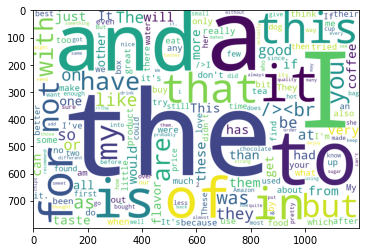

In [173]:
pyplot.imshow(Positive_word_cloud)

In [174]:
Nagative_word_cloud=WordCloud(width = 1200, height = 800,background_color ='white')

In [175]:
dictionary_of_frequency_of_Nagative_word=FreqDist(Whole_Nagative_Words_list)

In [176]:
Nagative_word_cloud.generate_from_frequencies(frequencies=dictionary_of_frequency_of_Nagative_word)

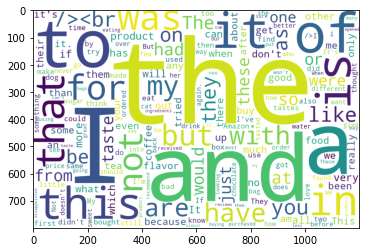

In [177]:
pyplot.imshow(Nagative_word_cloud)

# Morphological Analysis 👇

In [32]:
word_lemitizer=WordNetLemmatizer()

In [33]:
# with open("../Models/word_lemitizer.pickle","wb") as f:
#     pickle.dump(word_lemitizer,f)

In [34]:
Regular_expression_definition_for_html_tags=re.compile('<.*?>')
Regular_expression_definition_for_digits=re.compile('\d+\s|\s\d+|\s\d+\s')

In [35]:
word_to_be_handled=[
    "not",
    "no",
    "very"
]

In [36]:
english_stop_words=stopwords.words('english')

In [37]:
# with open("../Models/english_stop_words.pickle","wb") as f:
#     pickle.dump(english_stop_words,f)

In [38]:
def preprocessing_of_sentence(text):
    text=Regular_expression_definition_for_html_tags.sub(r" ",text)
    text=Regular_expression_definition_for_digits.sub(r" ",text)
    punctuations = [".",",","!","?","'",'"',":",";","*","-","/","+","%","$","#","@","(",")","[","]","{","}"]
    for i in punctuations:
        text = text.replace(i," ")
    text=text.lower().split()
    text=[word for word in text if word not in english_stop_words and len(word)>1 or word in word_to_be_handled]
    text=[word_lemitizer.lemmatize(word) for word in text]
    return text

In [39]:
Preprocessed_textual_data=[" ".join(preprocessing_of_sentence(text)) for text in data[review_column]]

In [40]:
Preprocessed_textual_data

['using hour year work great take every day saw kirkland day compared ingredient looked identical grabbed pack price 35 hour pack price absolutely effect since stuff think hour peep sent shill post maybe maybe not let see product result price no brainer',
 'cosco month sold searched found amazon thank wait week delivery dont know maybe made hand worth wait',
 'huge lavender fan never tried edible drinkable lavender product smell good little concerned would taste funny even though know smell taste tightly linked lavender seems like kind thing would smell way better taste glad find tea mostly taste like stronger chamomile tea smell like lavender best world',
 'always fan kashi golean crunch find perfect balance taste health best part kid actually love well significantly healthier many sugar cereal marketed kid even yo enjoys eating dry honey nut cheerio feel guilty giving kid bad cereal price perspective beat amazon subscribe save family six work four box pretty quick thanks amazon',
 'y

In [41]:
Preprocessed_Data=data

In [42]:
Preprocessed_Data[review_column]=Preprocessed_textual_data

In [43]:
Preprocessed_Data

,Text,Score
271560,using hour year work great take every day saw ...,5
143970,cosco month sold searched found amazon thank w...,5
195710,huge lavender fan never tried edible drinkable...,5
479054,always fan kashi golean crunch find perfect ba...,5
366160,year old mastiff despite tough appearance bit ...,5
...,...,...
567706,since willing try alot new thing thought would...,1
227635,cat picky eater no interest eating pill pocket...,1
104799,shocked received shipment rip instant coffee e...,1
242980,looked forward delicious hot cocoa very disapp...,1


In [44]:
Preprocessed_Data.to_csv('../Data/Processed_data/'+filename,index=False)

In [46]:
data[review_column][0]

KeyError: 0